In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data = pd.read_csv("train_data.txt",sep=":::")

test_data = pd.read_csv("test_data_solution.txt",sep=":::")

C:\Users\Parthiban\AppData\Local\Temp\ipykernel_25972\391268489.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data = pd.read_csv("train_data.txt",sep=":::")
C:\Users\Parthiban\AppData\Local\Temp\ipykernel_25972\391268489.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data = pd.read_csv("test_data_solution.txt",sep=":::")


In [4]:
print(train_data.shape)
print(test_data.shape)

(54213, 4)
(54199, 4)


In [5]:
print(train_data.columns)
print(test_data.columns)

Index(['1 ', ' Oscar et la dame rose (2009) ', ' drama ',
       ' Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.'],
      dtype='object')
Index(['1 ', ' Edgar's Lunch (1998) ', ' thriller ',
       ' L.R. Brane loves his life - his car, his apartment, his job, but especially his girlfriend, Vespa. One day while showering, Vespa runs out of shampoo. L.R. runs across the street to a convenience store to buy some more, a quick trip of no more than a few minutes. When he returns, Vespa is gone and e

In [6]:
train_data.columns =["id","title","genre","description"]
test_data.columns =["id","title","genre","description"]

In [7]:
print(train_data.columns)
print(test_data.columns)

Index(['id', 'title', 'genre', 'description'], dtype='object')
Index(['id', 'title', 'genre', 'description'], dtype='object')


In [8]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())


id             0
title          0
genre          0
description    0
dtype: int64
id             0
title          0
genre          0
description    0
dtype: int64


In [9]:
print(train_data.duplicated().sum())
print(test_data.duplicated().sum())

0
0


In [10]:
df = pd.concat([train_data,test_data])
df.head()

,id,title,genre,description
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...


In [11]:
genre_cnt = df['genre'].value_counts()
genre_cnt

genre
drama           27224
documentary     26192
comedy          14893
short           10145
horror           4408
thriller         3180
action           2629
western          2064
reality-tv       1767
family           1567
adventure        1550
music            1462
romance          1344
sci-fi           1293
adult            1180
crime            1010
animation         996
sport             863
talk-show         782
fantasy           645
mystery           637
musical           553
biography         529
history           486
game-show         387
news              362
war               264
Name: count, dtype: int64

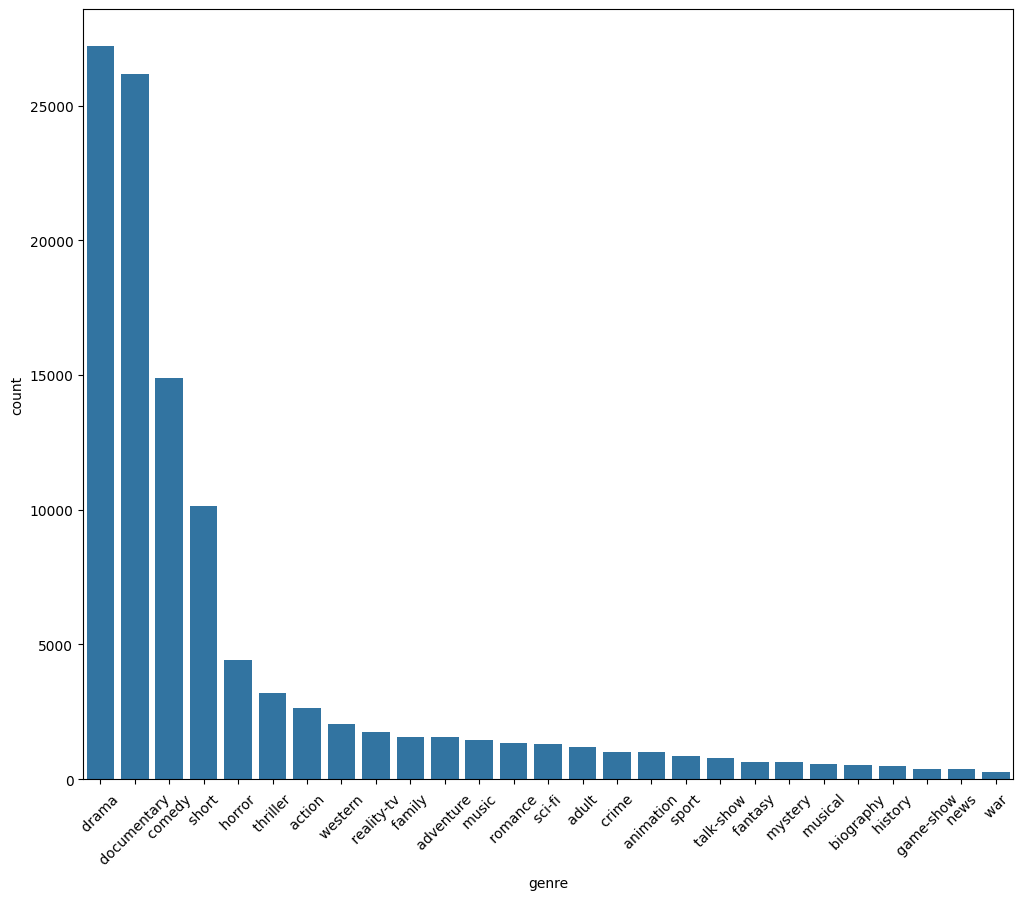

In [12]:
plt.figure(figsize=(12,10))
sns.barplot(genre_cnt)
plt.title='No of Movies per Genre'
plt.xlabel='Genre' 
plt.ylabel='No. of Movies'
plt.xticks(rotation=45)
plt.show()


In [13]:
x = df.drop('genre',axis=1)
y = df.genre
y.shape

(108412,)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.description,df.genre, test_size=0.2, random_state=42)


In [15]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

86729
21683
86729
21683


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix

tfidf_vectorizer = TfidfVectorizer(max_features=1000) 


X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)


X_test_tfidf = tfidf_vectorizer.transform(X_test)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)
nb_predictions = nb_classifier.predict(X_test_tfidf)



Naive Bayes Accuracy: 0.4764562099340497


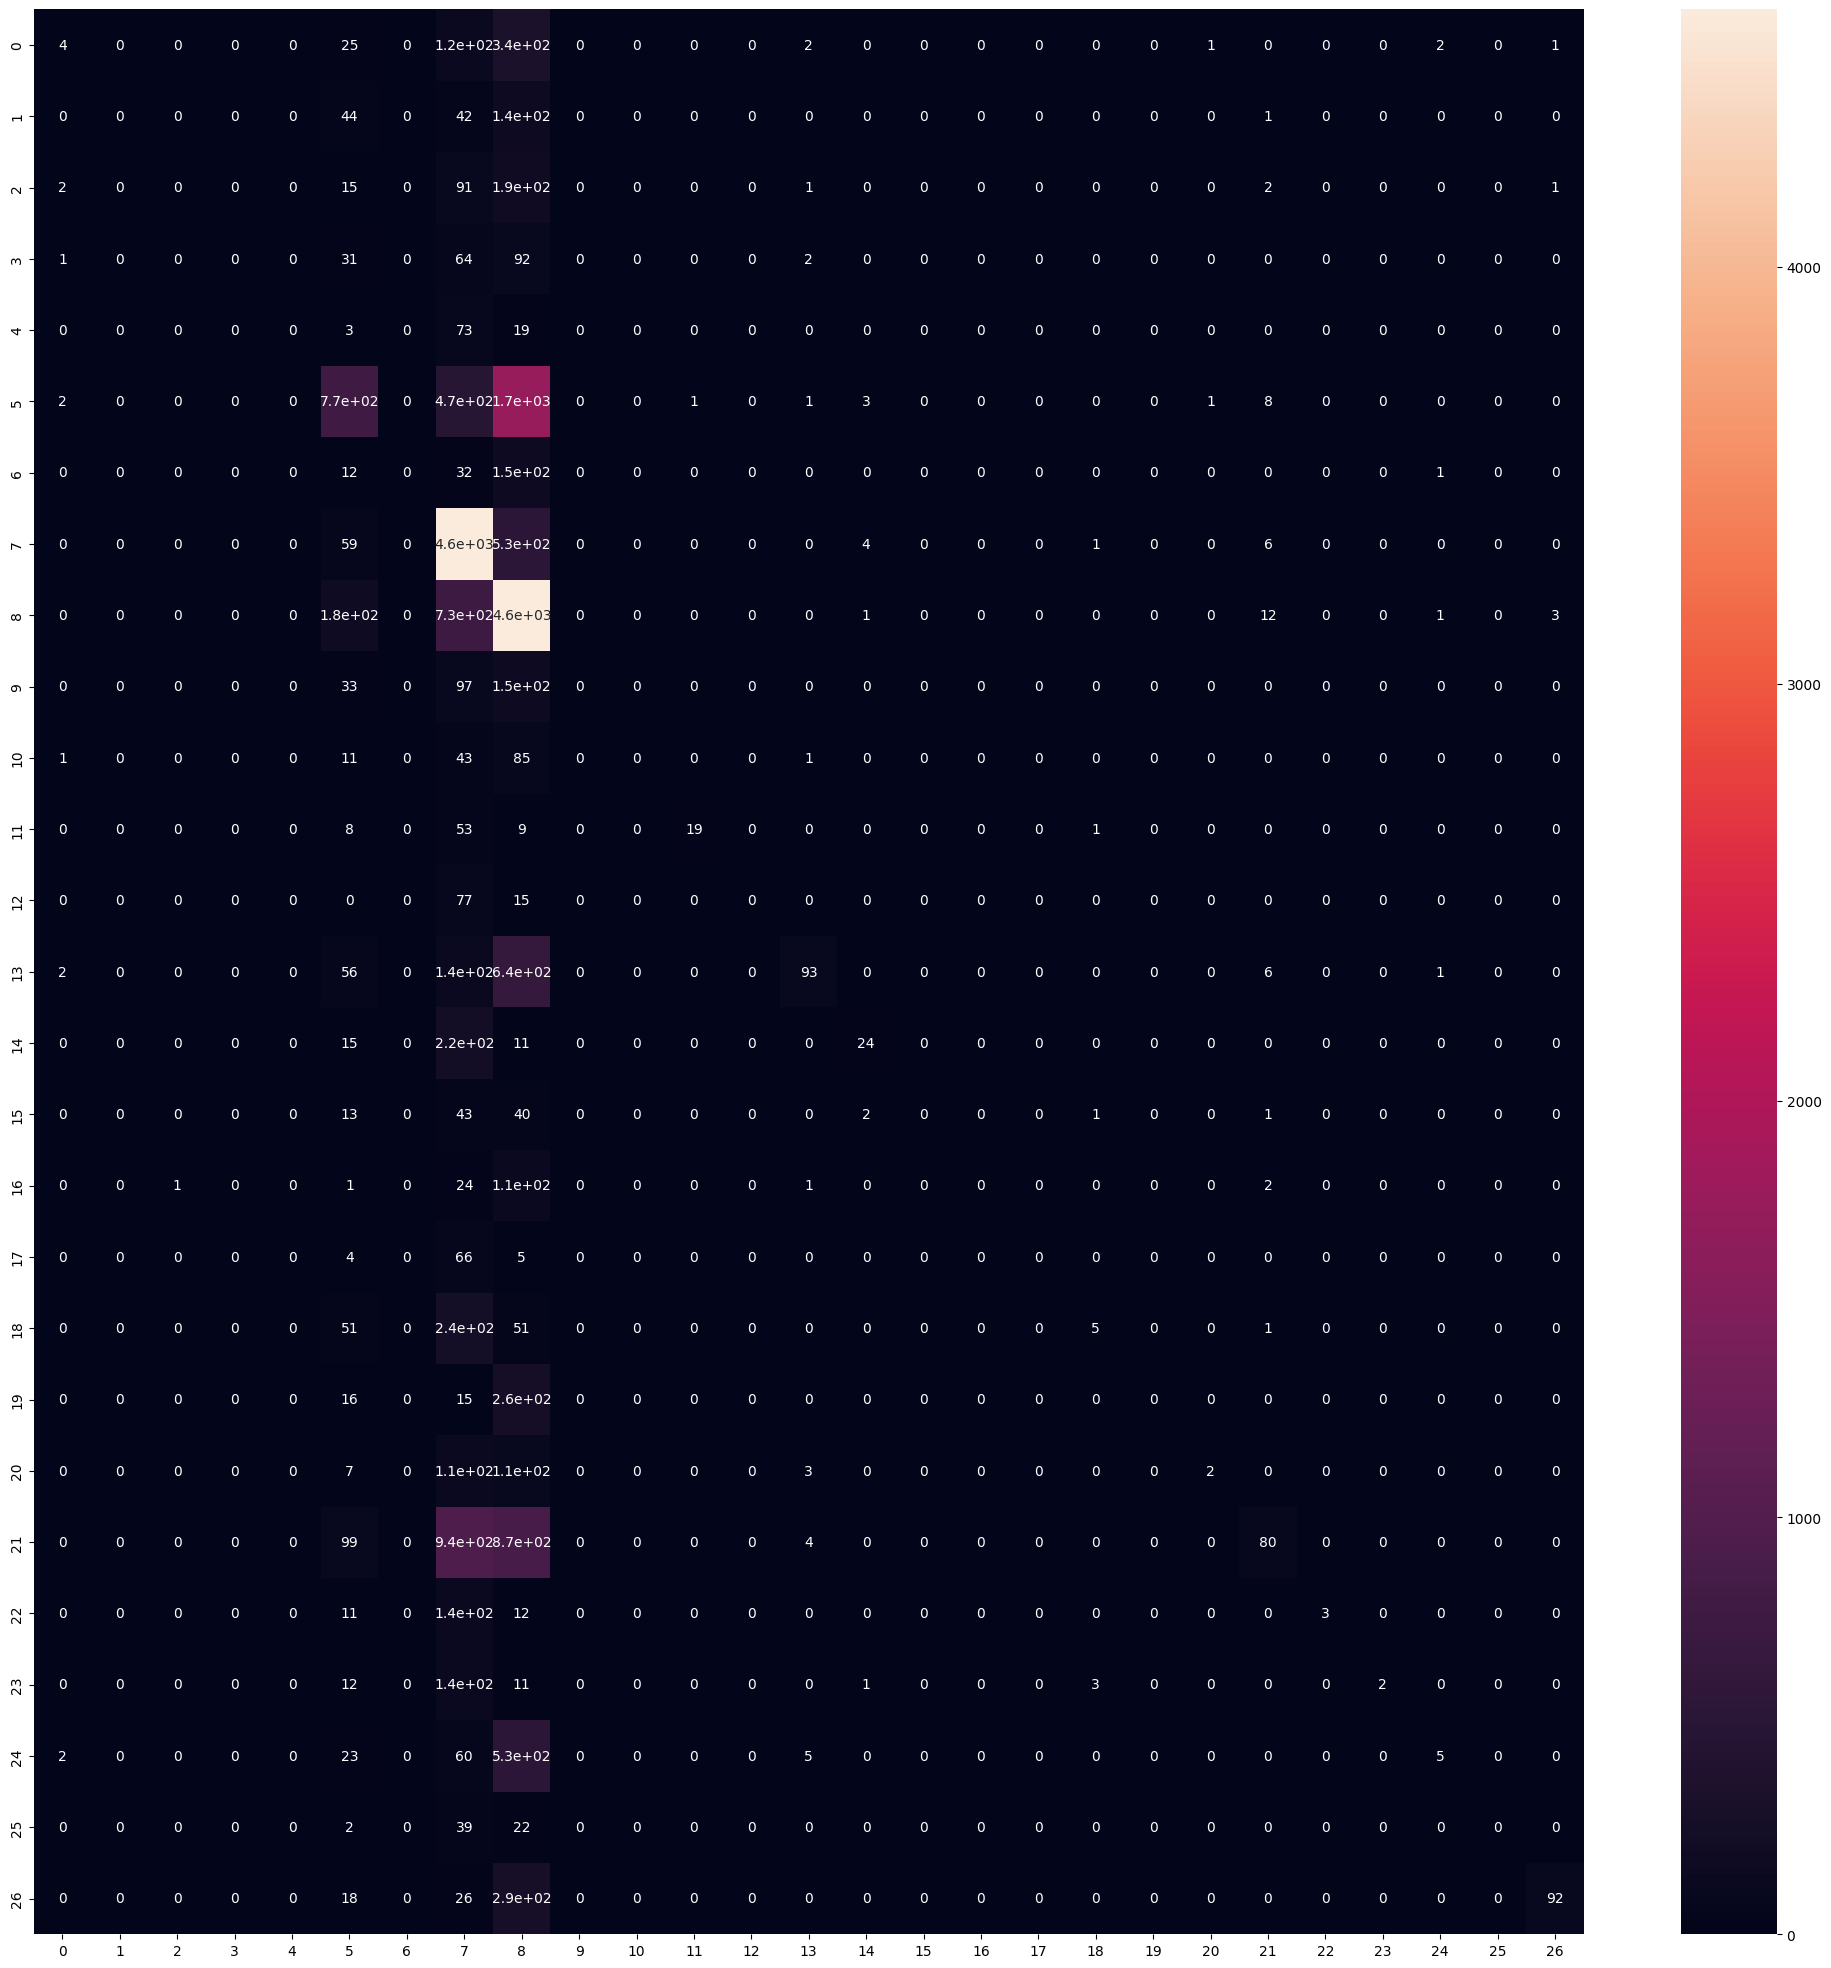

In [20]:
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Naive Bayes Accuracy:", nb_accuracy)
cm = confusion_matrix(y_test,nb_predictions)
%matplotlib inline
plt.figure(figsize=((25,25)))
sns.heatmap(cm,annot = True)

plt.show()

In [18]:
lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train_tfidf, y_train)
lr_predictions = lr_classifier.predict(X_test_tfidf)
lr_accuracy = accuracy_score(y_test, lr_predictions)


Logistic Regression Accuracy: 0.5581792187427939


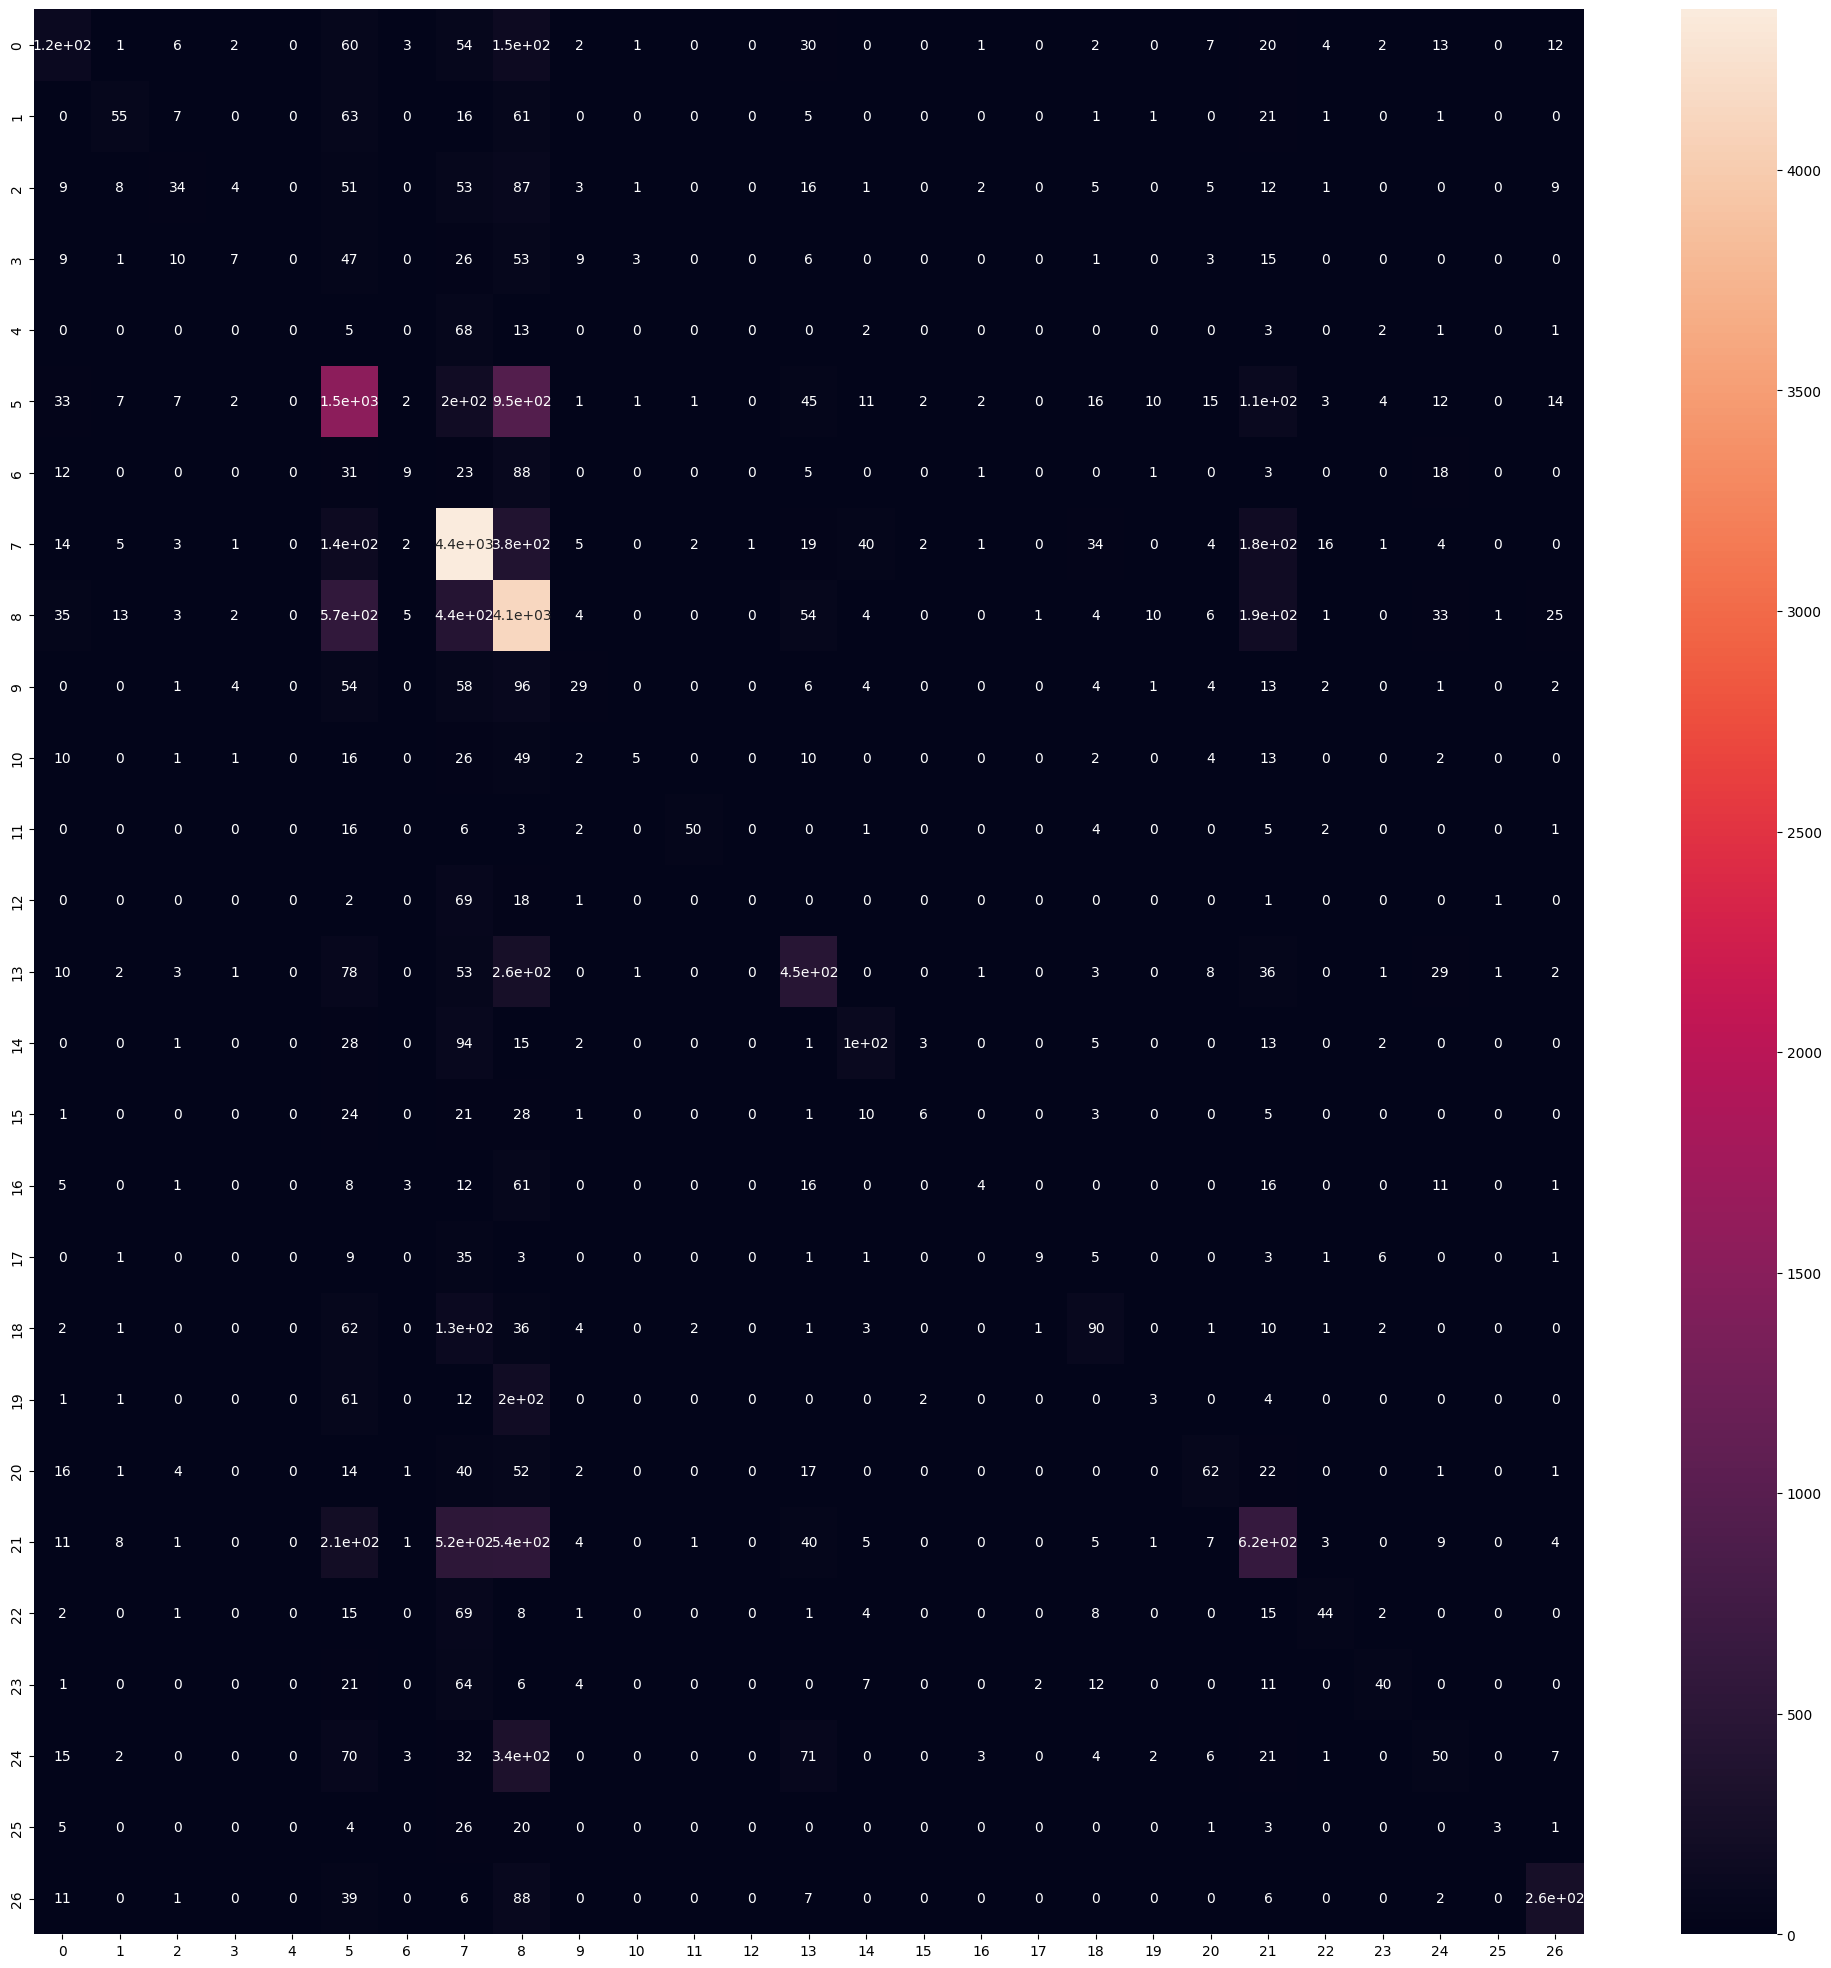

In [19]:
print("Logistic Regression Accuracy:", lr_accuracy)
cm = confusion_matrix(y_test,lr_predictions)
%matplotlib inline
plt.figure(figsize=((25,25)))
sns.heatmap(cm,annot = True)

plt.show()